<a href="https://colab.research.google.com/github/aga55-star/ORIE-4580-HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: A. Agarwal (aga55) and D. Fuentes (dwf64)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.
Probability a given bird visits the feeder at least once in a week:  $p = 1 - Pr$ {0 visits} $= 1 - e^{-λ}$

From the 10 tagged birds, the expected number that show up in a week is $10p$. With an average of 6 tagged birds per week, we have:

$10(1 - e^{-λ}) = 6 ⇒ 1 - e^{-λ} = 0.6 ⇒ e^{-λ} = 0.4 ⇒ \hat{λ} = -ln(0.4) $

Let N be the total population size, therefore, the expected number of distinct birds that visit in a week is $N_p = N(1 - e^{-λ})$

With an observed average of 28.8 birds visitng the feeder per week, we have:

$N(1 - e^{-λ}) = 28.8 ⇒ N ⋅ 0.6 = 28.8 ⇒ \hat{N} = 48$

Using the method of moments, we estimate a total population of 48 bids

<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.
There are N hawks in Ithaca, with K=10 of them tagged, m=20 distinct visitors and x=4 of them tagged (amongst the distinct visitors)


$X|N$  ̃ $Hypergeometric(N,K=10,m=20)$

$Pr(X=x,|N) =$ $\frac{\binom{10}{x}\binom{N-10}{m-x}}{\binom{N}{m}}$

The likelihood as a function of N is:

$L(N) ∝ \frac{\binom{N-10}{16}}{\binom{N}{20}}$

valid for integers N ≥ m = 20

To find the maximizing N, consider the likelihood ratio:

$R(N) = \frac{L(N+1)}{L(N)} = \frac{\binom{N-9}{16}}{\binom{N-10}{16}} ⋅ \frac{\binom{N}{20}}{\binom{N+1}{20}} = \frac{N-9}{N-25} ⋅ \frac{N-19}{N+1}$

Solving for R(N) ≥ 1:

$\frac{N-9}{N-25} ⋅ \frac{N-19}{N+1} ≥ 1 ⟺ (N-9)(N-19) ≥ (N-25)(N+1) ⟺ 196 - 4N ≥ 0 ⟺ N ≤ 49$

Therefore, L(N) increases up to N = 49 and decreses for N ≥ 49. $\hat{N_{MLE}} = 49$

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.
For each day, the true demand $N$  ̃ $Geom(p)$ on {0,1,2,..}

with $P(N=k) = (1-p)^kp$

and $Y=min(N,40)$


$P(Y = y)$ = \begin{cases}
    (1-p)^yp & \text{if } y = 0, 1, ..., 39 \\
    (1-p)^{40} & \text{if } y = 40 \\
    0 & \text{otherwise}
\end{cases}


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [2]:
import csv, re, math
from pathlib import Path

CAP = 40
CSV_PATH = "Soup_sales_data.csv"

def _parse_sales_cell(val):
    if val is None:
        return None
    s = str(val).strip()
    if s == "":
        return None

    s = s.replace(",", "")
    s = re.sub(r'^[><=+\s]+', '', s)
    s = re.sub(r'[+]+$', '', s)

    m = re.search(r'[-+]?\d+(\.\d+)?', s)
    if not m:
        raise ValueError(f"Cannot parse numeric sales from {val!r}")
    num = float(m.group(0))
    y = int(round(num))
    if y < 0:
        raise ValueError(f"Negative sales parsed from {val!r}")
    return y

def read_sales(csv_path=CSV_PATH):
    p = Path(csv_path)
    if not p.exists():
        raise FileNotFoundError(f"Could not find '{csv_path}'. Upload it or set CSV_PATH.")
    ys = []
    with open(p, newline="") as f:
        reader = csv.reader(f)
        first = next(reader, None)
        def row_first_numeric(row):
            for v in row:
                try:
                    _ = _parse_sales_cell(v)
                    return True
                except Exception:
                    continue
            return False

        if first is not None:
            if row_first_numeric(first):
                # treat as data row
                parsed = False
                for v in first:
                    try:
                        ys.append(_parse_sales_cell(v))
                        parsed = True
                        break
                    except Exception:
                        continue
                if not parsed:
                    pass

            for row in reader:
                if not row:
                    continue
                parsed = False
                for v in row:
                    try:
                        ys.append(_parse_sales_cell(v))
                        parsed = True
                        break
                    except Exception:
                        continue
    return ys

def mle_p_from_censored_geometric(y_values, cap=CAP):
    u = 0
    c = 0
    S = 0
    overcap_count = 0

    for y in y_values:
        if y is None:
            continue
        yy = int(y)
        if yy < 0:
            raise ValueError(f"Negative observed sales {yy} not allowed.")
        if yy < cap:
            u += 1
            S += yy
        else:
            c += 1
            if yy > cap:
                overcap_count += 1

    denom = S + cap*c + u
    if denom == 0:
        raise ZeroDivisionError("Denominator is zero (no valid observations?). Check the data.")
    p_hat = u / denom

    loglik = u*math.log(p_hat) + (S + cap*c)*math.log(1 - p_hat)

    return {
        "n_days": len(y_values),
        "uncensored_days_u": u,
        "censored_days_c": c,
        "sum_uncensored_S": S,
        "values_over_cap_treated_as_censored": overcap_count,
        "p_hat": p_hat,
        "loglik_at_p_hat": loglik}

ys = read_sales(CSV_PATH)
res = mle_p_from_censored_geometric(ys, cap=CAP)

print("=== Censored Geometric MLE Summary ===")
print(f"File: {CSV_PATH}")
print(f"Cap (censoring at): {CAP}")
print(f"n (days): {res['n_days']}")
print(f"u (uncensored, Y < {CAP}): {res['uncensored_days_u']}")
print(f"c (censored, Y >= {CAP}): {res['censored_days_c']}")
print(f"S (sum over uncensored Y): {res['sum_uncensored_S']}")
print(f"Values strictly > cap (counted as censored): {res['values_over_cap_treated_as_censored']}")
print(f"MLE p_hat = {res['p_hat']:.6f}")
print(f"log-likelihood at p_hat: {res['loglik_at_p_hat']:.3f}")

=== Censored Geometric MLE Summary ===
File: Soup_sales_data.csv
Cap (censoring at): 40
n (days): 100
u (uncensored, Y < 40): 39
c (censored, Y >= 40): 61
S (sum over uncensored Y): 780
Values strictly > cap (counted as censored): 60
MLE p_hat = 0.011967
log-likelihood at p_hat: -211.365


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

We assume each of the $n$ people has a birthday uniformly distributed over 365 days (ignoring leap years). Let $A$ be the event that at least two people share a birthday. Then
$$
P(A) = 1 - P(A^c),
$$
where $A^c$ is the event that all birthdays are distinct.

For the first person there are $365$ choices, for the second $364$, and so on, giving
$$
P(A^c) = \frac{365 \times 364 \times \cdots \times (365 - n + 1)}{365^n}
= \frac{(365)_n}{365^n}
= \frac{365!}{(365 - n)! \, 365^n}.
$$

Hence, the probability that at least two people share a birthday is
$$
\boxed{P(A) = 1 - \frac{365!}{(365 - n)! \, 365^n}}.
$$


/tmp/ipython-input-1432351610.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


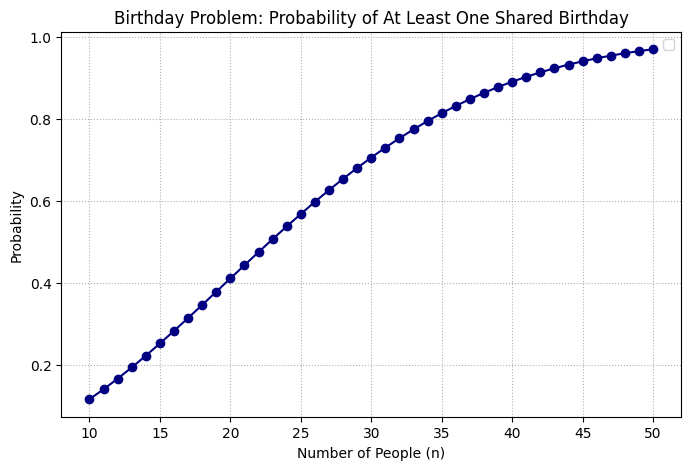

In [3]:
import math
import matplotlib.pyplot as plt

def p_at_least_one_shared(n, days=365):
    prob_no_shared = 1.0
    for k in range(n):
        prob_no_shared *= (days - k) / days
    return 1.0 - prob_no_shared

ns = range(10, 51)
ps = [p_at_least_one_shared(n) for n in ns]


plt.figure(figsize=(8, 5))
plt.plot(ns, ps, marker='o', linestyle='-', color='navy')
plt.title("Birthday Problem: Probability of At Least One Shared Birthday")
plt.xlabel("Number of People (n)")
plt.ylabel("Probability")
plt.grid(True, linestyle=':')
plt.legend()
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

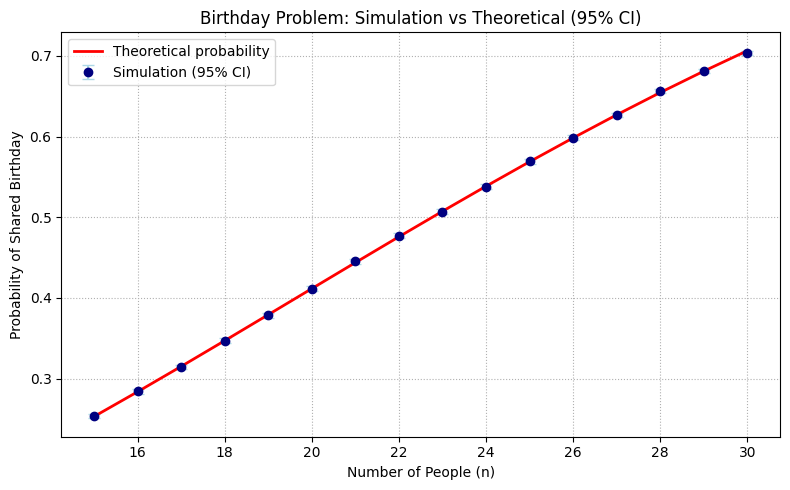

In [4]:
import numpy as np

def p_theoretical(n, days=365):
    prob_no_shared = 1.0
    for k in range(n):
        prob_no_shared *= (days - k) / days
    return 1.0 - prob_no_shared

days = 365
Nsim = 100000
ns = np.arange(15, 31)

sim_means = []
conf_low = []
conf_high = []
theoretical = []

for n in ns:

    birthdays = np.random.randint(0, days, size=(Nsim, n))

    birthdays.sort(axis=1)
    has_shared = np.any(np.diff(birthdays, axis=1) == 0, axis=1)

    p_hat = np.mean(has_shared)
    se = math.sqrt(p_hat * (1 - p_hat) / Nsim)
    z = 1.96
    ci_low = p_hat - z * se
    ci_high = p_hat + z * se

    sim_means.append(p_hat)
    conf_low.append(ci_low)
    conf_high.append(ci_high)
    theoretical.append(p_theoretical(n))

plt.figure(figsize=(8,5))
plt.errorbar(ns, sim_means,
             yerr=[np.array(sim_means) - np.array(conf_low),
                   np.array(conf_high) - np.array(sim_means)],
             fmt='o', color='navy', ecolor='lightblue', capsize=4,
             label='Simulation (95% CI)')
plt.plot(ns, theoretical, 'r-', lw=2, label='Theoretical probability')

plt.title("Birthday Problem: Simulation vs Theoretical (95% CI)")
plt.xlabel("Number of People (n)")
plt.ylabel("Probability of Shared Birthday")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

/tmp/ipython-input-709481127.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("/content/bdaydata.txt", delim_whitespace=True, names=["date", "count"], skiprows=1)


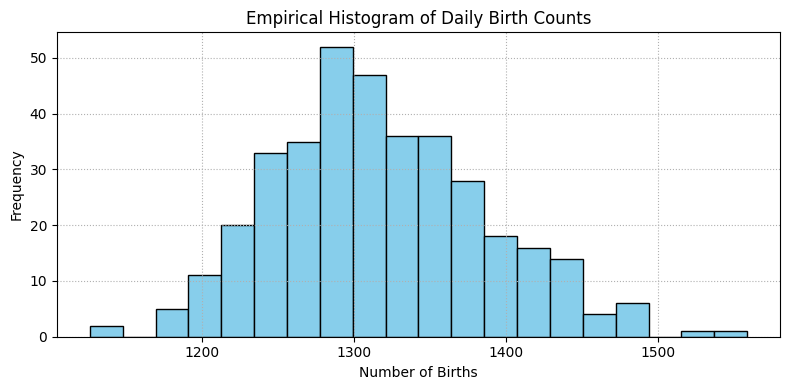

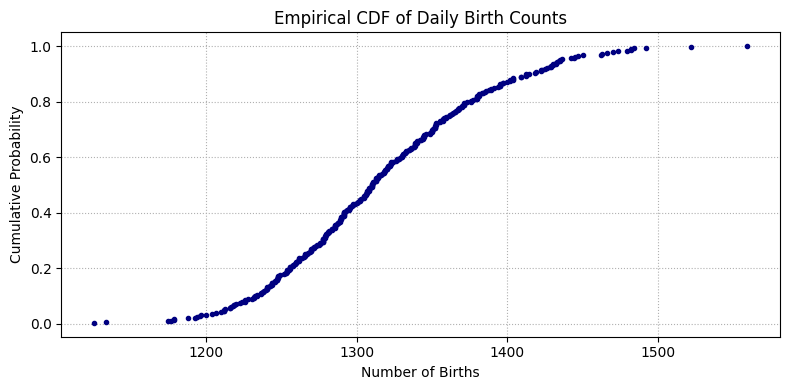

In [5]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Skip the header row and convert 'count' to numeric
data = pd.read_csv("/content/bdaydata.txt", delim_whitespace=True, names=["date", "count"], skiprows=1)
data["count"] = pd.to_numeric(data["count"])

# (i) Empirical histogram of the data
plt.figure(figsize=(8,4))
plt.hist(data["count"], bins=20, color='skyblue', edgecolor='black')
plt.title("Empirical Histogram of Daily Birth Counts")
plt.xlabel("Number of Births")
plt.ylabel("Frequency")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# (ii) Empirical cdf
sorted_counts = np.sort(data["count"])
cdf = np.arange(1, len(sorted_counts)+1) / len(sorted_counts)

plt.figure(figsize=(8,4))
plt.plot(sorted_counts, cdf, marker='.', linestyle='none', color='navy')
plt.title("Empirical CDF of Daily Birth Counts")
plt.xlabel("Number of Births")
plt.ylabel("Cumulative Probability")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

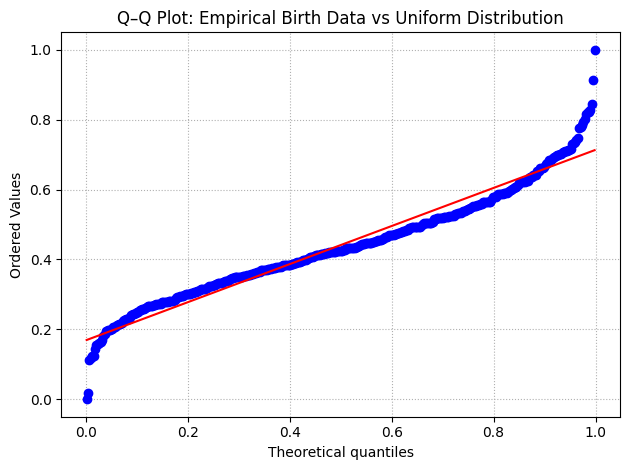

In [6]:
## Q-Q plot
normalized = (data["count"] - data["count"].min()) / (data["count"].max() - data["count"].min())
stats.probplot(normalized, dist="uniform", plot=plt)
plt.title("Q–Q Plot: Empirical Birth Data vs Uniform Distribution")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [7]:
## Chi-square test
from scipy.stats import chisquare, kstest

# Calculate expected counts for a uniform distribution using the mean of observed counts
total_births = data["count"].sum()
n_days = len(data)
total = data["count"].sum()
expected = np.full(n_days, total / n_days, dtype=float)  # float, exact total match

chi_stat, chi_p = chisquare(f_obs=data["count"].to_numpy(), f_exp=expected)

print("Chi-square Test for Uniformity:")
print(f"  Test Statistic = {chi_stat:.2f}")
print(f"  p-value        = {chi_p:.4e}")
print("  → Reject H₀ (uniform) if p < 0.05\n")

Chi-square Test for Uniformity:
  Test Statistic = 1352.72
  p-value        = 1.2489e-113
  → Reject H₀ (uniform) if p < 0.05



In [8]:
normalized = (data["count"] - data["count"].min()) / (data["count"].max() - data["count"].min())
ks_stat, ks_p = kstest(normalized, 'uniform')

print("Kolmogorov–Smirnov Test for Uniformity:")
print(f"  Test Statistic = {ks_stat:.4f}")
print(f"  p-value        = {ks_p:.4e}")
print("  → Reject H₀ (uniform) if p < 0.05")

Kolmogorov–Smirnov Test for Uniformity:
  Test Statistic = 0.2429
  p-value        = 1.9180e-19
  → Reject H₀ (uniform) if p < 0.05


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


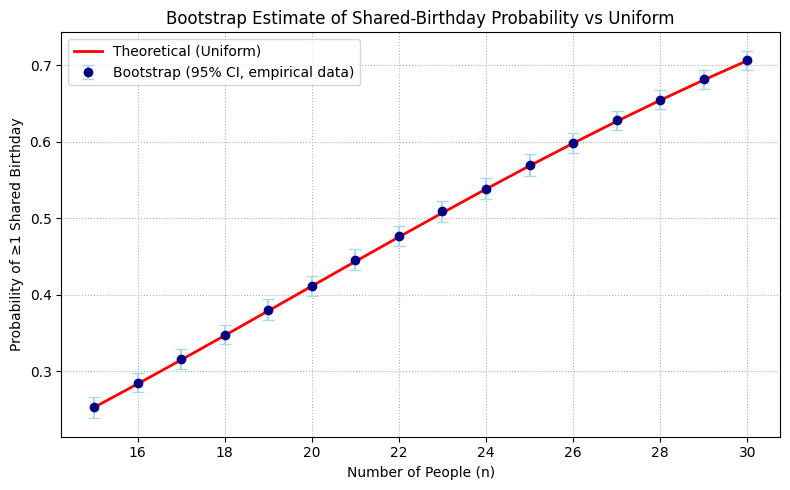

In [9]:
counts = data["count"].to_numpy()
weights = counts / counts.sum()


def p_shared_empirical(n, weights, sims=5000):
    draws = np.random.choice(len(weights), size=(sims, n), replace=True, p=weights)
    draws.sort(axis=1)
    return np.mean(np.any(np.diff(draws, axis=1) == 0, axis=1))

def p_theoretical(n, days=365):
    prob_no = 1.0
    for k in range(n):
        prob_no *= (days - k) / days
    return 1.0 - prob_no

ns = np.arange(15, 31)
B  = 300
S  = 5000
rng = np.random.default_rng(0)

boot = np.zeros((B, len(ns)))
for b in range(B):
    boot_counts = rng.choice(counts, size=len(counts), replace=True)
    p_boot = boot_counts / boot_counts.sum()
    for j, n in enumerate(ns):
        boot[b, j] = p_shared_empirical(n, p_boot, sims=S)

boot_mean = boot.mean(axis=0)
boot_lo   = np.percentile(boot, 2.5, axis=0)
boot_hi   = np.percentile(boot, 97.5, axis=0)

theory = np.array([p_theoretical(n) for n in ns])

plt.figure(figsize=(8,5))
plt.errorbar(ns, boot_mean,
             yerr=[boot_mean - boot_lo, boot_hi - boot_mean],
             fmt='o', capsize=4, color='navy', ecolor='lightblue',
             label='Bootstrap (95% CI, empirical data)')
plt.plot(ns, theory, 'r-', lw=2, label='Theoretical (Uniform)')
plt.xlabel("Number of People (n)")
plt.ylabel("Probability of ≥1 Shared Birthday")
plt.title("Bootstrap Estimate of Shared-Birthday Probability vs Uniform")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()


<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

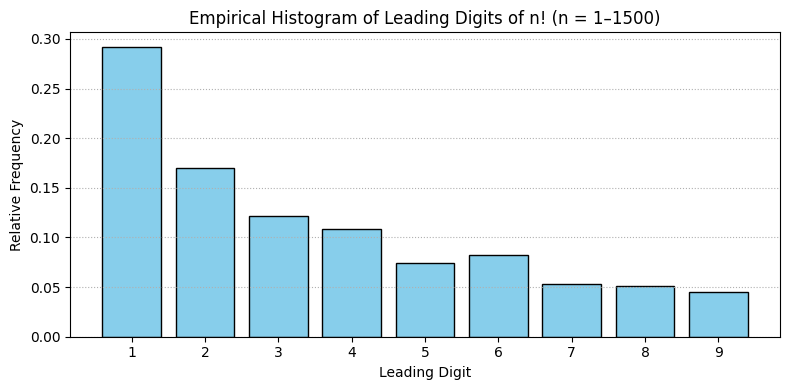

In [10]:
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt

n=1500

fact_series = [factorial(i, exact=True) for i in range(n)]

first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(fact_series[i])[0])

digits, counts = np.unique(first_digit, return_counts=True)
probs = counts / counts.sum()

plt.figure(figsize=(8,4))
plt.bar(digits, probs, color='skyblue', edgecolor='black')
plt.title("Empirical Histogram of Leading Digits of n! (n = 1–1500)")
plt.xlabel("Leading Digit")
plt.ylabel("Relative Frequency")
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [11]:
from scipy.stats import chisquare

expected = np.ones(9) * n / 9

observed = np.array([np.sum(first_digit == d) for d in range(1, 10)])

chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Test for Uniform Distribution of Leading Digits:")
print(f"Test Statistic = {chi_stat:.4f}")
print(f"p-value = {p_val:.4e}")

if p_val < 0.05:
    print("Reject H₀: The leading digits are not uniformly distributed.")
else:
    print("Fail to reject H₀: The leading digits could be uniform.")


Chi-square Test for Uniform Distribution of Leading Digits:
Test Statistic = 670.8000
p-value = 1.3806e-139
Reject H₀: The leading digits are not uniformly distributed.


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [12]:
digits = np.arange(1, 10)
p_benford = np.log10(digits + 1) - np.log10(digits)

expected_benford = p_benford * n

observed = np.array([np.sum(first_digit == d) for d in digits])

chi_stat_ben, p_val_ben = chisquare(f_obs=observed, f_exp=expected_benford)

print("Chi-square Test for Benford's Law Distribution:")
print(f"Test Statistic = {chi_stat_ben:.4f}")
print(f"p-value = {p_val_ben:.4e}")

if p_val_ben < 0.05:
    print("Reject H₀: The data does not follow Benford's Law closely.")
else:
    print("Fail to reject H₀: The data is consistent with Benford's Law.")

Chi-square Test for Benford's Law Distribution:
Test Statistic = 9.4566
p-value = 3.0525e-01
Fail to reject H₀: The data is consistent with Benford's Law.


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

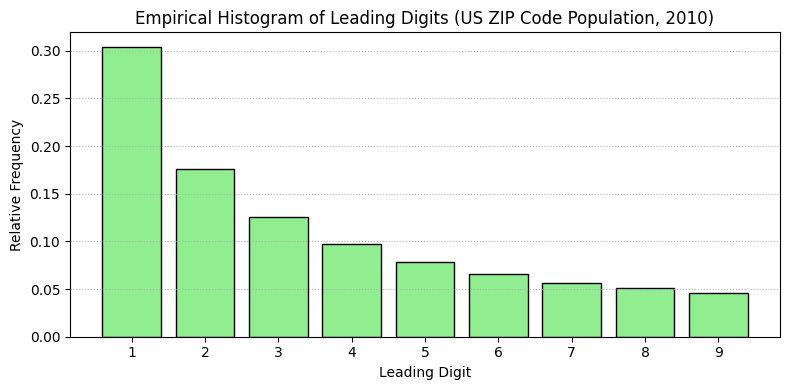

Chi-square Test (Uniform Distribution):
Statistic = 50323.5357,  p-value = 0.0000e+00
Reject H₀: Not uniform.

Chi-square Test (Benford's Law):
Statistic = 11.8432,  p-value = 1.5834e-01
Fail to reject H₀: Consistent with Benford's Law.


In [13]:
data = pd.read_csv("us_pop.csv")

pop = data.iloc[:, 0].to_numpy()

def get_first_digit(x):
    x = abs(x)
    while x >= 10:
        x //= 10
    while 0 < x < 1:
        x *= 10
    return int(str(x)[0]) if x > 0 else np.nan

first_digit = np.array([get_first_digit(x) for x in pop if x > 0])

digits, counts = np.unique(first_digit, return_counts=True)
n = len(first_digit)
probs = counts / n

plt.figure(figsize=(8,4))
plt.bar(digits, probs, color='lightgreen', edgecolor='black')
plt.title("Empirical Histogram of Leading Digits (US ZIP Code Population, 2010)")
plt.xlabel("Leading Digit")
plt.ylabel("Relative Frequency")
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()

expected_uniform = np.ones(9) * n / 9
chi_u, p_u = chisquare(f_obs=counts, f_exp=expected_uniform)
print("Chi-square Test (Uniform Distribution):")
print(f"Statistic = {chi_u:.4f},  p-value = {p_u:.4e}")
if p_u < 0.05:
    print("Reject H₀: Not uniform.")
else:
    print("Fail to reject H₀: Could be uniform.")
print()

p_benford = np.log10(np.arange(2, 11)) - np.log10(np.arange(1, 10))
expected_benford = p_benford * n
chi_b, p_b = chisquare(f_obs=counts, f_exp=expected_benford)
print("Chi-square Test (Benford's Law):")
print(f"Statistic = {chi_b:.4f},  p-value = {p_b:.4e}")
if p_b < 0.05:
    print("Reject H₀: Does not follow Benford's Law closely.")
else:
    print("Fail to reject H₀: Consistent with Benford's Law.")


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.